In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

In [ ]:
time = np.array([ 0.        ,  0.34791667,  0.43680556,  1.79861111,  2.23402778,
                  2.97013889,  3.09791667,  3.32152778,  5.45138889,  6.26944444,
                  6.37777778,  7.25486111,  8.57152778,  9.62083333, 15.27986111,
                  19.51111111, 19.74375   , 22.31666667])

cell_count = np.array([9.54400000e+05, 1.26724444e+06, 1.35422222e+06, 3.13960000e+06,
                        4.72780000e+06, 8.33440000e+06, 9.79520000e+06, 1.09504000e+07,
                        6.21152000e+07, 1.14874000e+08, 1.33330000e+08, 2.50126000e+08,
                        1.25864000e+09, 1.57020000e+09, 3.00634000e+09, 2.07916000e+09,
                        2.85956000e+09, 3.62056000e+09])

log2cd = np.log2(cell_count)

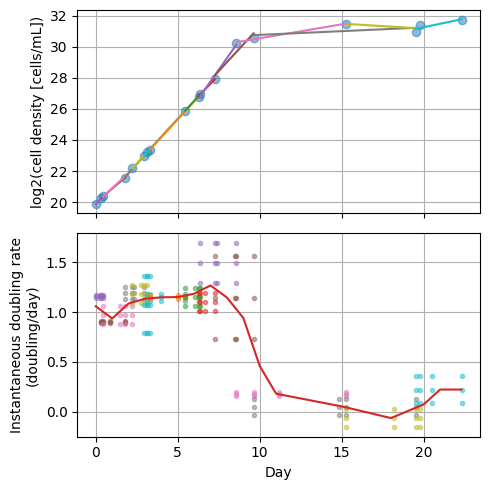

In [ ]:
sw = 3
fig, axs = plt.subplots(nrows = 2, figsize=(5,5))

colormap = matplotlib.colormaps['tab10']

axs[0].plot(time, log2cd, 'C0o', alpha=0.5)
idr_list = []
time_list = []

for i in range(sw, len(log2cd)+1):
  time_array = time[i-sw:i]
  if np.max(time_array)>np.min(time_array):
    LR = linregress(time_array,log2cd[i-sw:i])
    axs[0].plot(time_array, LR.slope*time_array+LR.intercept, '-', color = colormap(i%10+1))
    for idr in [LR.slope, LR.slope+LR.stderr, LR.slope-LR.stderr]:
      idr_list.append([idr, idr, idr, idr])
      time_list.append([np.max(time_array), np.median(time_array), np.mean(time_array), np.min(time_array)])
      axs[1].plot([np.max(time_array), np.median(time_array), np.mean(time_array), np.min(time_array)],[idr, idr, idr, idr],  '.',  alpha = 0.5, color = colormap(i%10+1))

time_list = np.array(time_list).flatten()
idr_list = np.array(idr_list).flatten()


#interpolation fit
unique_time = np.unique(np.round(time_list,0))
idr_mean = []
for ut in unique_time:
  idr_group = idr_list[abs(time_list-ut)<=0.5]
  mean_idr = np.mean(idr_group)
  idr_mean.append(median_idr)

t_fit = np.arange(np.min(time_list), np.max(time_list), 0.1)

y_interp = np.interp(t_fit, unique_time, idr_mean)

axs[1].plot(t_fit, y_interp, 'C3-')

axs[0].set_xticklabels([])
axs[1].set_xlabel('Day')
axs[0].set_ylabel('log2(cell density [cells/mL])')
axs[1].set_ylabel('Instantaneous doubling rate\n(doubling/day)')

for ax in axs:
  ax.grid('on')
fig.tight_layout()

fig.savefig('/content/Growth_curve_fit.pdf')
fig.show()